<a href="https://colab.research.google.com/github/Dibyaroy25/Titanic-Data-Analysis-and-Survival-Prediction/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving titanic.csv to titanic.csv


{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/titanic.csv")

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 4.3MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 604kB 25.5MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 3.1MB 32.7MB/s 
     |████████████████████████████████| 296kB 41.7MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=4630709cce6bdd37e2f89a97662ea51c241a495182fe991a2c070c20dd0d50d8
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


In [ ]:
profile.to_notebook_iframe()

#Dataset Info

In [ ]:
data.head(5)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

##The first 5 rows of the dataset.

In [ ]:
data.shape

(891, 12)

##The dataset has 891 rows and 12 columns.

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##Column types -CATEGORICAL	5, DISCRETE	5 and CONTINUOUS 2

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##Name and Cabin has alot of missing values.

In [ ]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

##We see PassengerId, Name, Ticket is highly cardinal which is of no use so lets remove it.

In [ ]:
data.drop(['PassengerId'],inplace=True, axis = 1)
data.drop(['Name'],inplace=True, axis = 1)
data.drop(['Ticket'],inplace=True, axis = 1)
print("Done.")

Done.


#Column "Cabin"

In [ ]:
data["Cabin"].value_counts(dropna=False)

NaN            687
B96 B98          4
C23 C25 C27      4
G6               4
F33              3
              ... 
C54              1
B79              1
C90              1
A10              1
D56              1
Name: Cabin, Length: 148, dtype: int64

##We see more than 70% of the data in "Cabin" column has null values.
##Since the Cabin name starts with a Letter lets extract that to study the column.

In [ ]:
data["Cabin"]=data['Cabin'].str[0]

In [ ]:
data.groupby("Pclass")["Cabin"].value_counts(dropna=False)

Pclass  Cabin
1       C         59
        B         47
        NaN       40
        D         29
        E         25
        A         15
        T          1
2       NaN      168
        F          8
        D          4
        E          4
3       NaN      479
        F          5
        G          4
        E          3
Name: Cabin, dtype: int64

##We see maximum people with null cabin belonged to the 3rd class, which means 3rd class passanger were given least priority to assign a cabin.

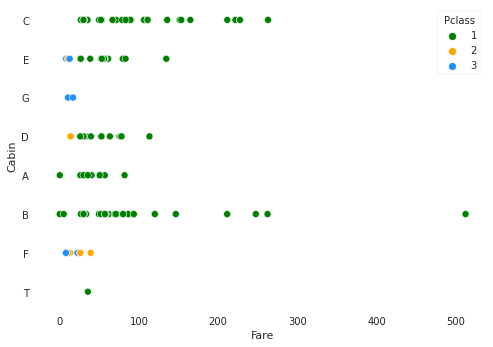

In [ ]:
sns.scatterplot(data=data, x='Fare', y='Cabin', hue ='Pclass',palette=['green','orange','dodgerblue'])

##We see 3rd class and 2nd class passangers had few specific cabins.

In [ ]:
data.groupby("Survived")["Cabin"].value_counts(dropna=False)

Survived  Cabin
0         NaN      481
          C         24
          B         12
          A          8
          D          8
          E          8
          F          5
          G          2
          T          1
1         NaN      206
          B         35
          C         35
          D         25
          E         24
          F          8
          A          7
          G          2
Name: Cabin, dtype: int64

In [ ]:
data.groupby("Survived")["Pclass"].value_counts(dropna=False)

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

##Passangers who survived, maximum of them has null cabin and mostly belonged to 1st and 3rd class.

##Since it is not possible to impute the null values of the Cabin Column so we will drop it.

In [ ]:
data.drop(['Cabin'],inplace=True, axis = 1)
print("Done.")

Done.


#Column "Fare"

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


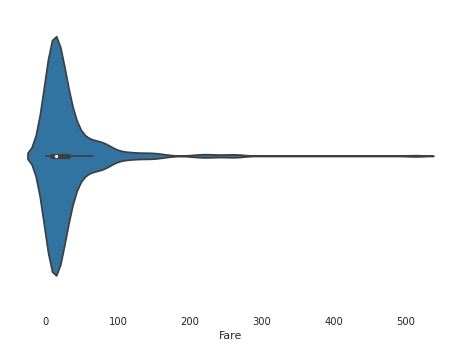

In [ ]:
sns.violinplot(data["Fare"])

##This column is highly right skewed.

In [ ]:
data["Fare"].min()

0.0

##Min Fare was 0.0

In [ ]:
data["Fare"].max()

512.3292

##Max Fare was 512.3292

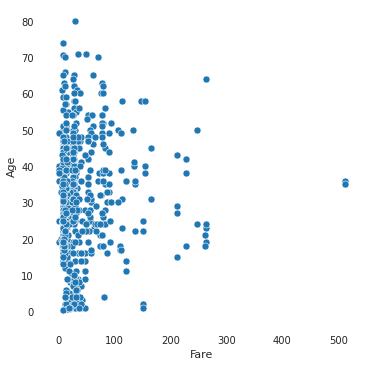

In [ ]:
sns.relplot(x="Fare", y="Age", data=data);

##Highest fare was paid by some middle aged person,while most paid less than 100.

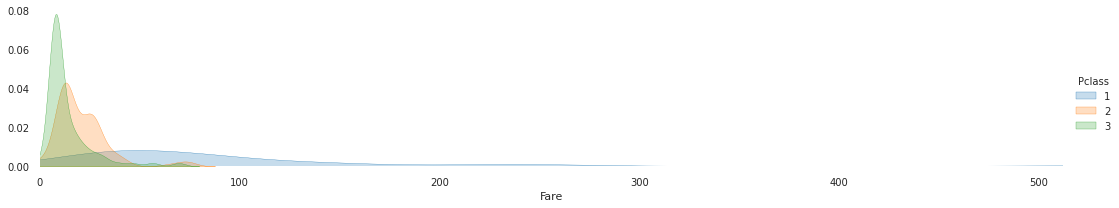

In [ ]:
as_fig = sns.FacetGrid(data,hue='Pclass',aspect=5)

as_fig.map(sns.kdeplot,'Fare',shade=True)

oldest = data['Fare'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()


##1st class passangers paid the highest fare.

---



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


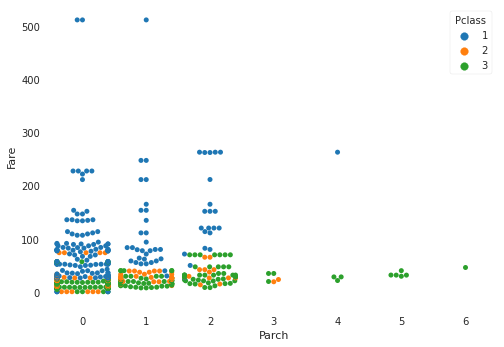

In [ ]:
sns.swarmplot(data=data,y='Fare',x="Parch",hue='Pclass')

##Fare inc. with inc. in family heads and also inc with the choice of class.
##People with 0 family preffered mostly 1st classs.

#Column "Age"

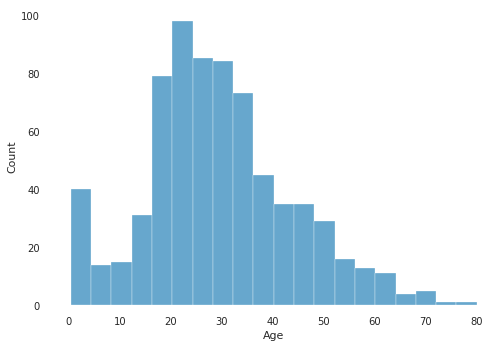

In [ ]:
sns.histplot(data["Age"])

##We see the age column is right skewed.

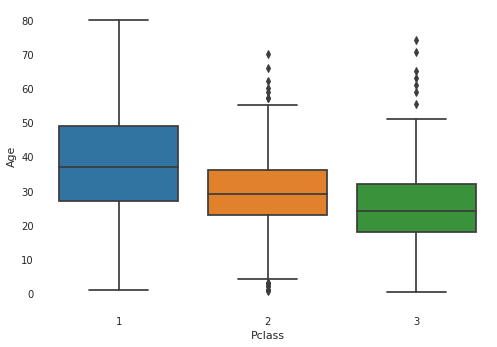

In [ ]:
sns.boxplot(data=data, y='Age', x='Pclass')

##Older passangers mostly preferred 1st class.Lets impute the null values of age column with Pclass median.

In [ ]:
data.groupby("Pclass")["Age"].describe().T

Pclass           1           2           3
count   186.000000  173.000000  355.000000
mean     38.233441   29.877630   25.140620
std      14.802856   14.001077   12.495398
min       0.920000    0.670000    0.420000
25%      27.000000   23.000000   18.000000
50%      37.000000   29.000000   24.000000
75%      49.000000   36.000000   32.000000
max      80.000000   70.000000   74.000000

In [ ]:
data["Age"]=data["Age"].fillna(data.groupby("Pclass")["Age"].transform("median"))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


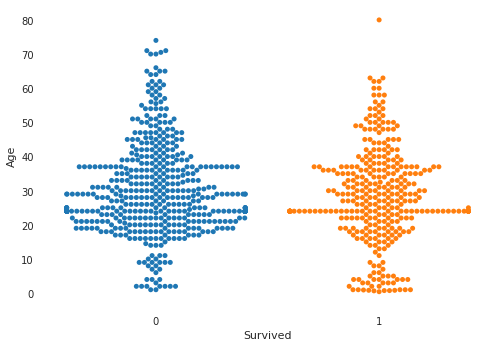

In [ ]:
sns.swarmplot(data=data, y='Age', x='Survived')

##Passengers of 20+ age survived more.

#Column "Embarked"

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


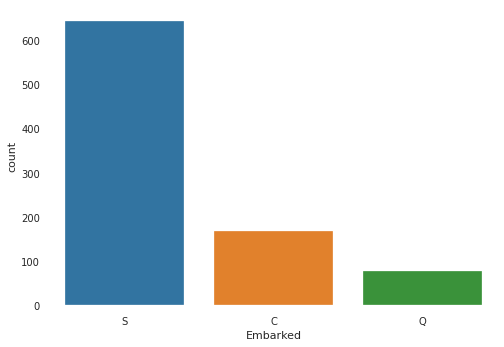

In [ ]:
sns.countplot(data["Embarked"])

##Lets see the null rows of "Embarked" column

In [ ]:
data[data["Embarked"].isnull()]

Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN

##We can say that both the passanger depoted from same port since there ticket number and fare is same.So lets input the null values by their mode.

In [ ]:
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


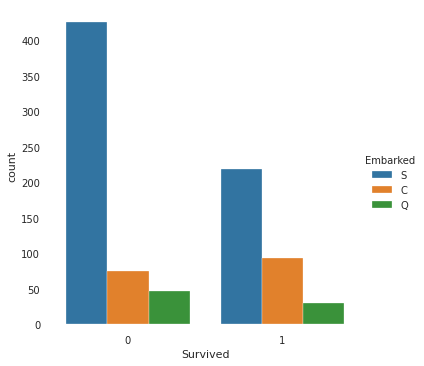

In [ ]:
sns.factorplot('Survived',data=data,hue='Embarked',kind='count')

##Passengers of "S" port mostly died, majority of "C" port survived.

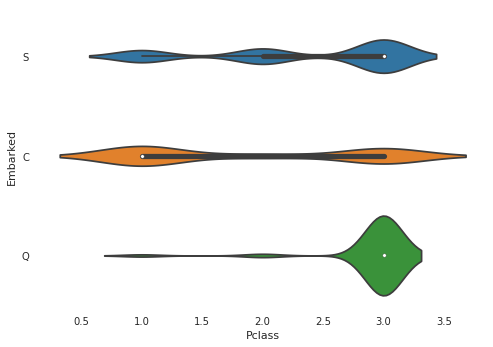

In [ ]:
sns.violinplot(data=data,y='Embarked',x="Pclass")

##People deported from "Q" port were mostly for 3rd class.

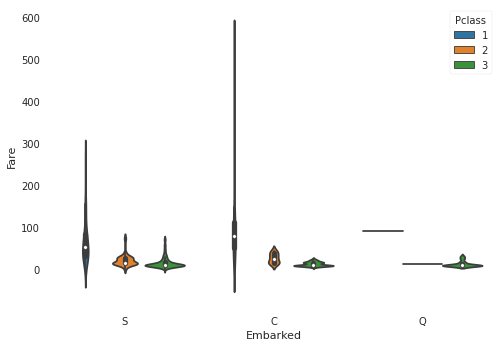

In [ ]:
sns.violinplot(data=data,x='Embarked',y="Fare",hue="Pclass")

##Passengers of 1st class who deported from "C" port paid most.

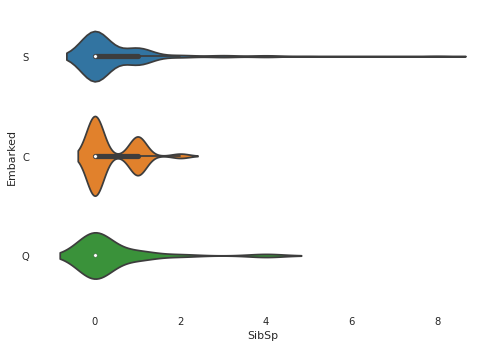

In [ ]:
sns.violinplot(data=data,y='Embarked',x="SibSp")

##People with large family depoted from "S" port may be because it was big enough to accomodate large no. of people.

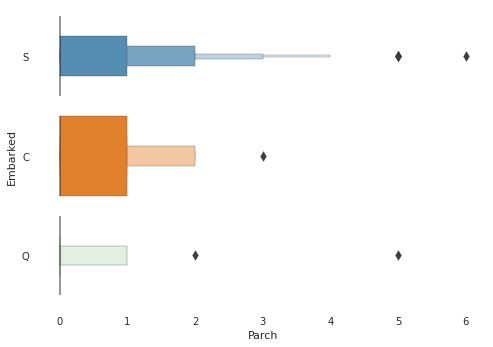

In [ ]:
sns.boxenplot(data=data,y='Embarked',x="Parch")

##Passengers depoted from "S" port had bigger families

#Column "Sex"

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


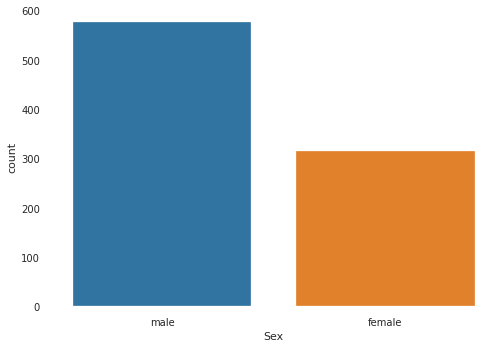

In [ ]:
sns.countplot(data["Sex"])

##There were more male passengers in the ship.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


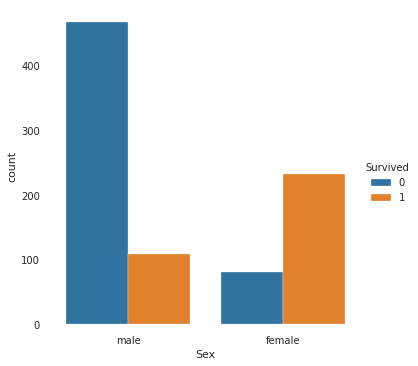

In [ ]:
sns.factorplot('Sex',data=data,hue='Survived',kind='count')

##We see more Female survived.

#Column "SibSp"

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


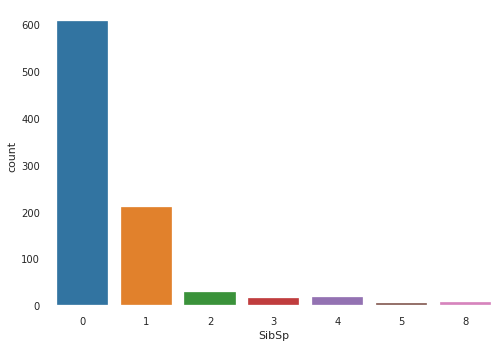

In [ ]:
sns.countplot(data["SibSp"])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


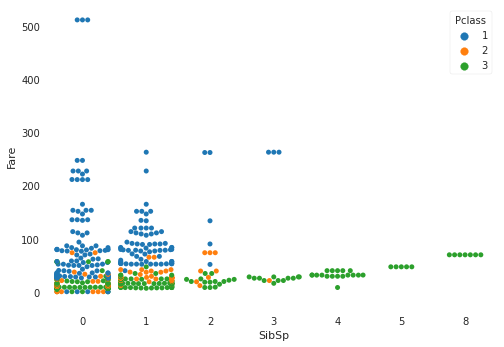

In [ ]:
sns.swarmplot(data=data,y='Fare',x="SibSp",hue='Pclass')

##People with few siblings preferred first class.
##Cost of Fare was high for even 3rd class for large no. of siblings.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


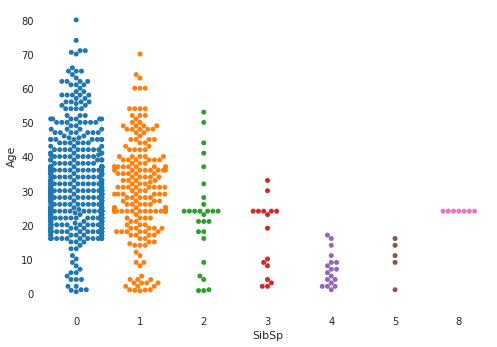

In [ ]:
sns.swarmplot(data=data,y='Age',x="SibSp")

##Older Passengers usually had 0 SibSp.

#Data Encoding

In [ ]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

##Lets encode the two categorical column.

In [ ]:
data=pd.get_dummies(data=data,drop_first=False)

In [ ]:
data.head()

Survived  Pclass   Age  SibSp  ...  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0         0       3  22.0      1  ...         1           0           0           1
1         1       1  38.0      1  ...         0           1           0           0
2         1       3  26.0      0  ...         0           0           0           1
3         1       1  35.0      1  ...         0           0           0           1
4         0       3  35.0      0  ...         1           0           0           1

[5 rows x 11 columns]

#Splitting

In [ ]:
X = data.iloc[:, 1:8].values 
Y = data.iloc[:, 0].values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#Feature Scaling

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

#Accuracy

In [ ]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [ ]:
model = models(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0]Logistic Regression Training Accuracy: 0.8033707865168539
[1]K Nearest Neighbor Training Accuracy: 0.797752808988764
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7865168539325843
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6671348314606742
[4]Gaussian Naive Bayes Training Accuracy: 0.7963483146067416
[5]Decision Tree Classifier Training Accuracy: 0.9817415730337079
[6]Random Forest Classifier Training Accuracy: 0.9620786516853933


In [ ]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(Y_test, model[i].predict(X_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()# Print a new line

[[95 15]
 [20 49]]
Model[0] Testing Accuracy = "0.8044692737430168 !"

[[91 19]
 [27 42]]
Model[1] Testing Accuracy = "0.7430167597765364 !"

[[92 18]
 [20 49]]
Model[2] Testing Accuracy = "0.7877094972067039 !"

[[104   6]
 [ 43  26]]
Model[3] Testing Accuracy = "0.7262569832402235 !"

[[93 17]
 [20 49]]
Model[4] Testing Accuracy = "0.7932960893854749 !"

[[94 16]
 [23 46]]
Model[5] Testing Accuracy = "0.7821229050279329 !"

[[102   8]
 [ 22  47]]
Model[6] Testing Accuracy = "0.8324022346368715 !"



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def create_score(model,X_train,X_test):
    Accuracy_data = []
    for i in range(len(model)):
        train_result = accuracy_score(Y_train,model[i].predict(X_train))
        test_result = accuracy_score(Y_test,model[i].predict(X_test))
        Accuracy_data.append([model[i],train_result,test_result])

    return pd.DataFrame(Accuracy_data,columns = ['models','Train score','Test score'])

scr = create_score(model,X_train,X_test)

In [ ]:
scr

models  Train score  Test score
0  LogisticRegression(C=1.0, class_weight=None, d...     0.803371    0.804469
1  KNeighborsClassifier(algorithm='auto', leaf_si...     0.797753    0.743017
2  SVC(C=1.0, break_ties=False, cache_size=200, c...     0.786517    0.787709
3  SVC(C=1.0, break_ties=False, cache_size=200, c...     0.667135    0.726257
4       GaussianNB(priors=None, var_smoothing=1e-09)     0.796348    0.793296
5  DecisionTreeClassifier(ccp_alpha=0.0, class_we...     0.981742    0.782123
6  (DecisionTreeClassifier(ccp_alpha=0.0, class_w...     0.962079    0.832402

##The three best model for my dataset is "LogisticRegression" , "Linear Classifier" and "RBF Classifier" since the rest overfits the data.Among all "RBF Classifier's" accuracy inc the best from training.

